##### This program is to predict the employee promotion. The test data is from Analytics Vidya - HR Analytics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hrtrain=pd.read_csv("HRAnalytics/train_LZdllcl.csv")
hrtest=pd.read_csv("HRAnalytics/test_2umaH9m.csv")

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
hrtrain.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [6]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
# Problem statement
# The task is to predict whether a potential promotee at checkoiint in the test set 
# will be promoted or not after the evaluation process.

In [8]:
hrtrain.info()
# education and previous_year_rating   have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
hrtest.info()
# education and previous_year_rating   have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [10]:
hrtrain.education.value_counts(dropna=False) #Impute NA with Bachelor's  bcaz this is large category

education
Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: count, dtype: int64

In [11]:
hrtrain.education=hrtrain.education.fillna(hrtrain.education.value_counts().idxmax())
#idxmax will index of maximum frequency in value counts() tab;e

In [12]:
hrtest.education=hrtest.education.fillna(hrtest.education.value_counts().idxmax())

In [13]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [14]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [15]:
hrtrain.previous_year_rating.value_counts(dropna=False) #Impute NA with 3.0 bcaz this is large category

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: count, dtype: int64

In [16]:
hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(3.0)

In [17]:
hrtest.previous_year_rating.value_counts(dropna=False) #Impute NA with 3.0 bcaz this is large category

previous_year_rating
3.0    7921
5.0    5097
4.0    4249
1.0    2680
NaN    1812
2.0    1731
Name: count, dtype: int64

In [18]:
hrtest.previous_year_rating=hrtest.previous_year_rating.fillna(3.0)

In [19]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [20]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [21]:
# Split the data into numeric cols and object cols

In [22]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [23]:
numcols=hrtrain[['no_of_trainings','age','length_of_service','avg_training_score']]
objectcols=hrtrain[['department', 'region', 'education', 'gender', 'recruitment_channel',
                    'KPIs_met >80%', 'awards_won?','is_promoted']]
#'KPIs_met >80%' - yes, no , 'awards_won?' - yes, no (not numeric values)

In [24]:
# EDA on Numeric Data describe, skew and kurt
# Histogram. Boxplot and Density curve - avg_training_score - Univariate Plots
# Correlation and Heatmap - numcols - Bivariate Statistics and Plots

In [25]:
print(numcols.describe())
print("Skewness:",numcols.skew())
print("Kurtosis:",numcols.kurt())

       no_of_trainings           age  length_of_service  avg_training_score
count     54808.000000  54808.000000       54808.000000        54808.000000
mean          1.253011     34.803915           5.865512           63.386750
std           0.609264      7.660169           4.265094           13.371559
min           1.000000     20.000000           1.000000           39.000000
25%           1.000000     29.000000           3.000000           51.000000
50%           1.000000     33.000000           5.000000           60.000000
75%           1.000000     39.000000           7.000000           76.000000
max          10.000000     60.000000          37.000000           99.000000
Skewness: no_of_trainings       3.445434
age                   1.007432
length_of_service     1.738061
avg_training_score    0.451908
dtype: float64
Kurtosis: no_of_trainings       18.740082
age                    0.792353
length_of_service      4.414031
avg_training_score    -1.049649
dtype: float64


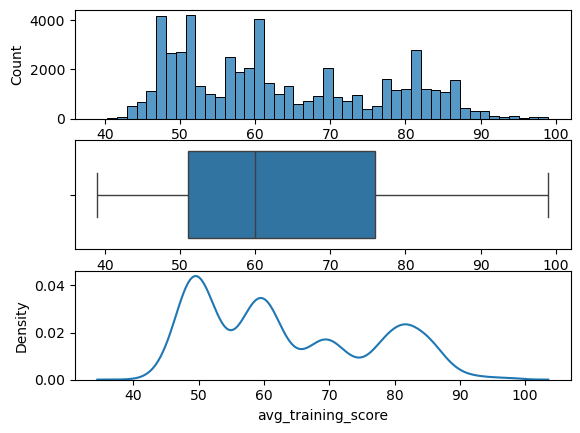

In [26]:
import seaborn as sns
fig,ax=plt.subplots(3,1)
sns.histplot(hrtrain.avg_training_score,ax=ax[0])
sns.boxplot(hrtrain.avg_training_score,ax=ax[1],orient="h")
sns.kdeplot(hrtrain.avg_training_score,ax=ax[2])
plt.show()
# Density curve has multiple peaks

<Axes: >

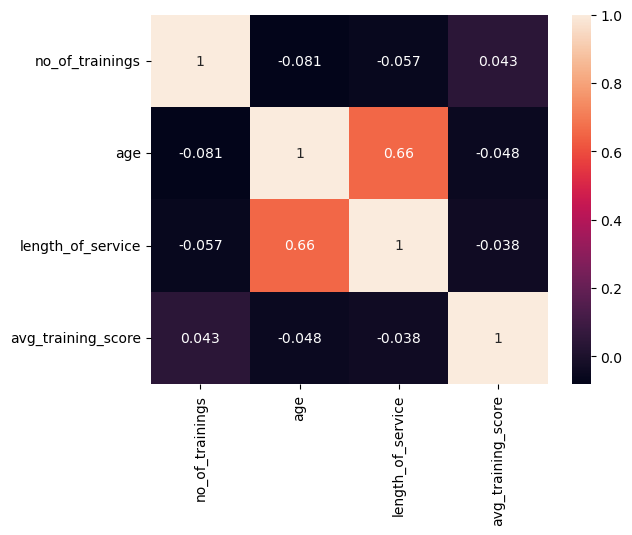

In [27]:
sns.heatmap(numcols.corr(),annot=True)
# There are no multi colinearity

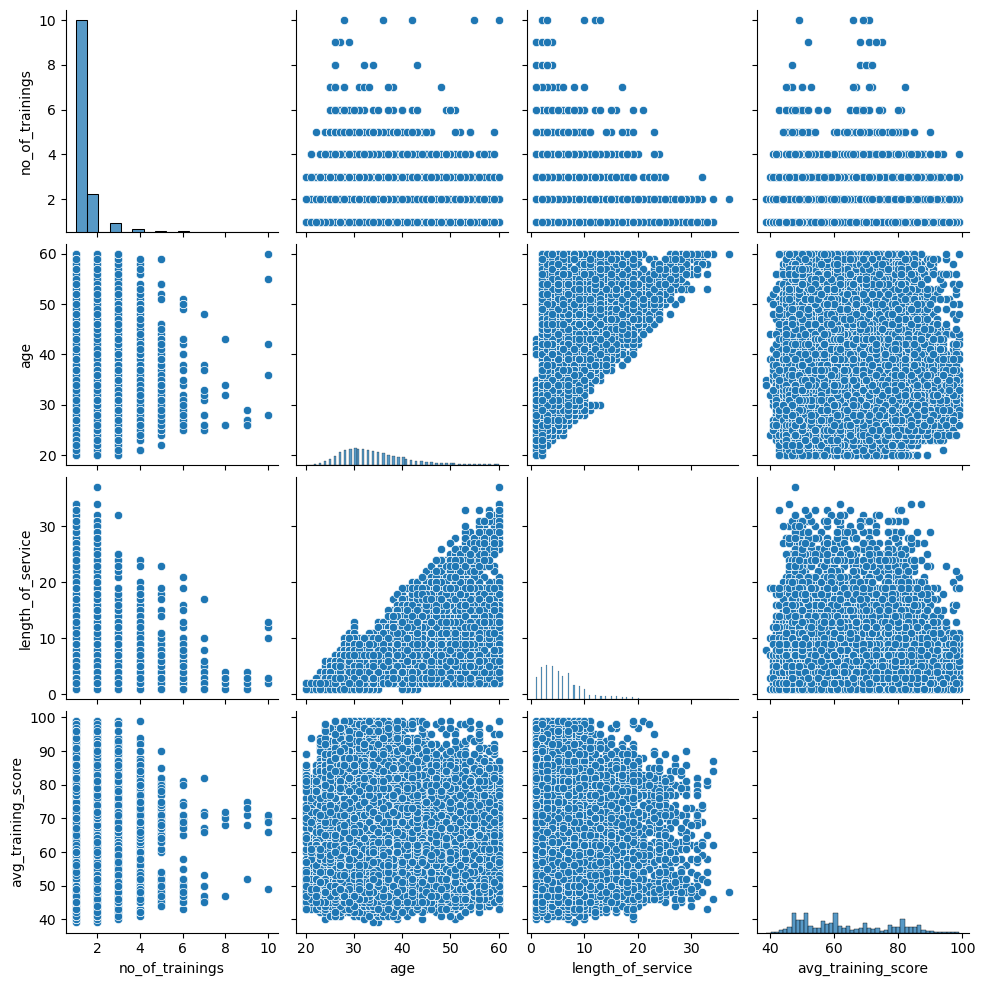

In [28]:
sns.pairplot(numcols) # - Bivariate plot - Scatter plot

In [29]:
# While checking multicolinearity, No correlation between age and average training score (Also in the heatmap it's -0.048)
# Length of service and Age has a little correlation (0.66)

In [30]:
# Frequency counts of all object cols
for col in objectcols.columns:
    freq=objectcols[col].value_counts()
    print(freq)

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
education
Bachelor's          39078
Maste

##### What is the Average of avg_training_score for different gender?
 What is the Average of avg_training_score for different kpismet?
 What is the Average of avg_training_score for different recruitment channel?
 What is the Average of length_of_service  for different education?
 What is the Average of length_of_service for different department?

In [32]:
# What is the Average of avg_training_score for different gender?
hrtrain['avg_training_score'].groupby(hrtrain['gender']).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [33]:
# What is the Average of avg_training_score for different kpismet?
hrtrain['avg_training_score'].groupby(hrtrain['KPIs_met >80%']).mean()

KPIs_met >80%
0    62.614241
1    64.809030
Name: avg_training_score, dtype: float64

In [34]:
# What is the Average of avg_training_score for different recruitment channel?
hrtrain['avg_training_score'].groupby(hrtrain['recruitment_channel']).mean()

recruitment_channel
other       63.362839
referred    66.182137
sourcing    63.280620
Name: avg_training_score, dtype: float64

In [35]:
# What is the Average of length_of_service  for different education?
hrtrain['length_of_service'].groupby(hrtrain['education']).mean()

education
Bachelor's          5.286760
Below Secondary     1.704348
Master's & above    7.605293
Name: length_of_service, dtype: float64

In [36]:
# What is the Average of avg_training_score for different department?

In [37]:
hrtrain['avg_training_score'].groupby(hrtrain['department']).mean()

department
Analytics            84.602952
Finance              60.222003
HR                   50.018197
Legal                59.868142
Operations           60.226648
Procurement          70.122443
R&D                  84.596597
Sales & Marketing    50.261698
Technology           79.928692
Name: avg_training_score, dtype: float64

In [38]:
# Rules for hypothesis test. 
# Aggreagation is done to study the EDA and for hypothesis test
# 1. Means have to be differet
# 2. How many levels are there. two levels t-test. more than two levels ANONA

##### Test Null H - Average of avg_training_score for different gender are equal

In [40]:
# Test Null H - Average of avg_training_score for different gender are equal

# Split data, frame Null H and Alt H, Conduct test & Interpret
# After EDA do hypotheses test then do data preprocessing (dummy encode categorical data)
# combine the numcols and object cols 
# Build the model

In [41]:
# Exactly two levels/classes - 2 Sample Independent T test
male=hrtrain[hrtrain.gender=="m"]
female=hrtrain[hrtrain.gender=="f"]

In [42]:
# Null H - There is no significant difference in average avg_training_score of male and female
# Alt H - There is significant difference in average avg_training_score of male and female

In [43]:
from scipy.stats import ttest_ind

In [44]:
ttest_ind(male.avg_training_score,female.avg_training_score,equal_var=False)
# Since p-value is less than 0.05, Reject null hypothesis
# There is significant difference in Average avg_training_score of male and female

TtestResult(statistic=-6.122262326710494, pvalue=9.321257169457854e-10, df=35820.249659813104)

In [45]:
hrtrain['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

##### Test Null H - Average of avg_training_score for different genderrecruitment_channel are equal

In [47]:
# Split data
# Frame Nll H and Alt H
# more than two levels/classes - Anova Single Factor

In [48]:
# More than two levels/classes - Anova Single Factor
sourcing=hrtrain[hrtrain.recruitment_channel=="sourcing"]
referal=hrtrain[hrtrain.recruitment_channel=="referred"]
other=hrtrain[hrtrain.recruitment_channel=="other"]

# Null H - There is no significant differece in Average avg_training_score of different recruitment_channel
# Alt H - There is no significant differece in Average avg_training_score of different recruitment_channel

In [49]:
from scipy.stats import f_oneway

In [50]:
f_oneway(referal.avg_training_score,sourcing.avg_training_score,other.avg_training_score)
# Since p-value is less than 0.05 I am rejecting the Null Hypothesis

F_onewayResult(statistic=25.758203095600138, pvalue=6.585805990029605e-12)

In [51]:
# Test Null H - No Associantion netween geneder and is_promoted
# Here there is direct
# Both variables Non numeric categorical - Chi Square test of independence


# Null H - There is no assciation between both variables
# Alt H - There is assciation between both variables
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.gender))

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

In [52]:
# Since p-value is less than 0.05, I am rejecting the Null H and there is relationship/association between gender and promotion

In [53]:
# Dummy variable encoding
objectcols.head(3)

,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,0,0
1,Operations,region_22,Bachelor's,m,other,0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,0,0,0


In [54]:
objectcols.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

In [55]:
objectcols_dummy=pd.get_dummies(objectcols,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
                         'KPIs_met >80%', 'awards_won?'])

In [56]:
objectcols_dummy.head(3)

,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,True,True,False
1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,True,False
2,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,True,False


In [57]:
# concatenate numcols and objectcols_dummy - column concatenation
hrtrain_df=pd.concat([numcols,objectcols_dummy],axis=1)

In [58]:
# Split data into dependent variable y and independent variables X's
y=hrtrain_df.is_promoted
X=hrtrain_df.drop('is_promoted', axis=1)

In [59]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model=LogisticRegression(max_iter=500)
model.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [62]:
model.score(X,y) # Accuracy from confusion matrix

0.9316340680192673

In [63]:
y_predict=model.predict(X)

In [64]:
# Actualclass Vs Predicted Class
pd.crosstab(y,y_predict)

col_0,0,1
row_0,,
0,49891,249
1,3498,1170


In [65]:
# Accuracy = (TP+TN)/TP+FN+FP+TN
# is_promotes = 0 is Negative, 1 is Positive
(1170+49491)/(1170+3498+249+49891)

# is_promoted - Negative is - 0 , Positive is 1
# 49891 - TN
# 249 - FP
# 3498 - FN
# 1170 - TP

# Accuracy - 0.9243358633776091

0.9243358633776091

In [66]:
# Classification Report
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     50140
           1       0.82      0.25      0.38      4668

    accuracy                           0.93     54808
   macro avg       0.88      0.62      0.67     54808
weighted avg       0.93      0.93      0.91     54808



In [68]:
# Recall and F1 Score for minority class is not good
# 1      recall        0.25     f1-score 0.38      
# This is because of Imbalance data
# Objective is to find the promoted employees , that has the issue here

In [69]:
# AUC curve , The ROC curve is the plot of the TPR (True Positve Rate) against the FPR (False Positive Rate)
# at each threshold setting.
# AUC should be greater than 0.70 is agood fit model

In [70]:
from sklearn.metrics import RocCurveDisplay

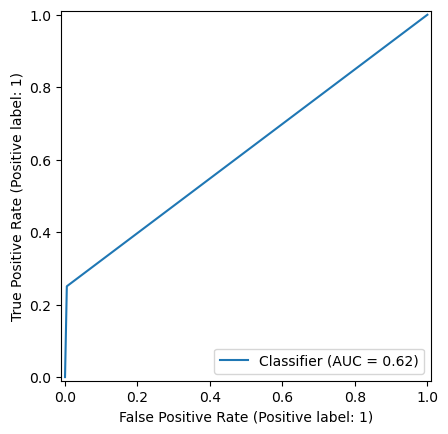

In [71]:
RocCurveDisplay.from_predictions(y,y_predict)

In [72]:
# Since AUC = 0.62, which is less than 0.70 this model is not good fit model
# This is because of Imbalance data (is_promoted 1 - 4668 (Minority class) , 0 - 50140 (Majotity class) )

<Axes: xlabel='is_promoted'>

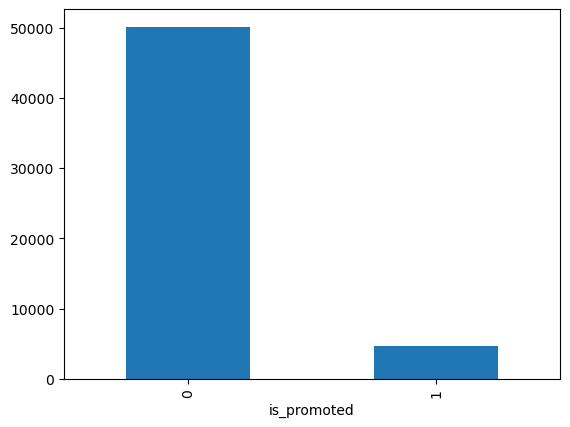

In [73]:
hrtrain.is_promoted.value_counts().plot(kind="bar")

In [74]:
# 65% 35% is ok
# Minority class predictions (recall, precision, and F1 score) is very bad. 
# Accuracy is good, which is not the right metric
# Algorithm doesn't have enough data to process

##### Using SMOTE to fix Imbalance Data

In [76]:
from imblearn.over_sampling import SMOTENC

In [77]:
X.rename(columns={"education_Bachelor's": "education_Bachelors", "education_Master's & above" : "education_Masters & above"}, inplace=True)

In [78]:
X.columns

Index(['no_of_trainings', 'age', 'length_of_service', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'region_region_4',
       'region_region_5', 'region_region_6', 're

In [79]:
smote=SMOTENC(categorical_features=['department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'region_region_4',
       'region_region_5', 'region_region_6', 'region_region_7',
       'region_region_8', 'region_region_9', 
       'education_Bachelors', 'education_Below Secondary', 
        'education_Masters & above', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'KPIs_met >80%_0', 'KPIs_met >80%_1',
       'awards_won?_0', 'awards_won?_1'])

In [80]:
X_smote,y_smote=smote.fit_resample(X,y)

In [81]:
pd.DataFrame(y).value_counts()
pd.DataFrame(y_smote).value_counts()

0
0    50140
1    50140
Name: count, dtype: int64

In [82]:
model=LogisticRegression(max_iter=500)
model.fit(X_smote,y_smote)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [83]:
model.score(X_smote,y_smote)

0.8473573992820104

In [84]:
y_predict=model.predict(X_smote)

In [85]:
pd.crosstab(y_smote,y_predict)

col_0,0,1
row_0,,
0,42224,7916
1,7391,42749


In [86]:
# Accuracy
(42677+42141)/(7463+7999+42677+42141)

0.8458117271639409

In [87]:
print(classification_report(y_smote,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     50140
           1       0.84      0.85      0.85     50140

    accuracy                           0.85    100280
   macro avg       0.85      0.85      0.85    100280
weighted avg       0.85      0.85      0.85    100280



In [88]:
# After applying SMOTE recall and f1-score improved drastically

# Before SMOTE
# Recall and F1 Score for minority class is not good
# 1       0.82      0.25      0.38      4668
# 1      recall      0.25     f1-score 0.38    

# After SMOTE
# 1       0.84      0.85      0.85     50140
# 1      recall     0.85    f1-score 0.85 